リアルタイム音声取得や波形描画処理をする

<IPython.core.display.Javascript object>


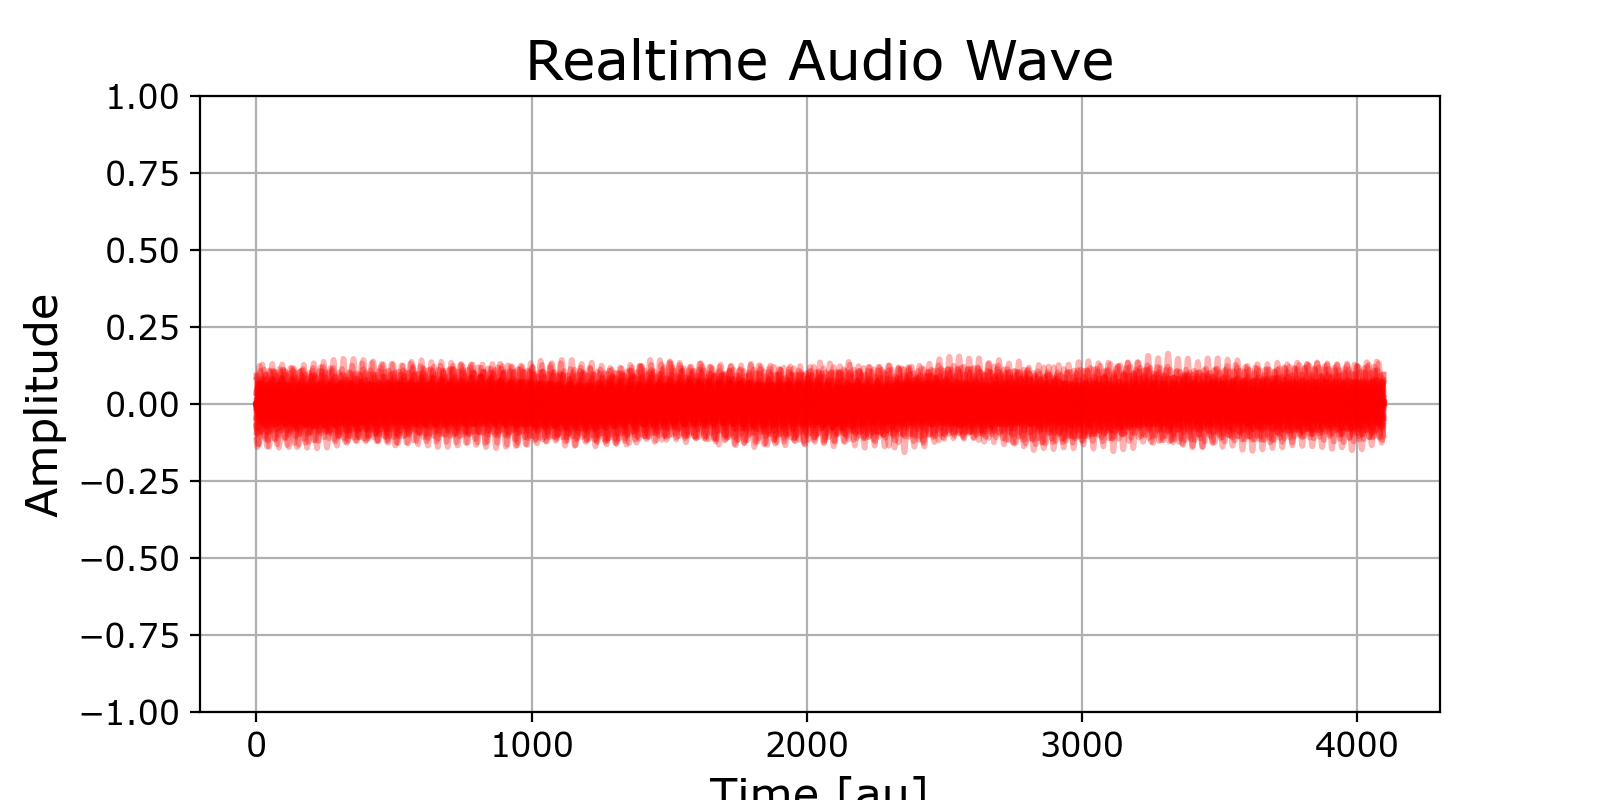

In [1]:
from avfaudio.audio_capturing_rubicon import AVAudioNodeTapBlock_Capture
import time

# ........... チャート化するためのコード（ここから） ...................
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=[8,4])
ax = fig.add_subplot(111)

plt.tick_params(labelsize=12)
plt.title("Realtime Audio Wave", fontsize=20)
plt.xlabel("Time [au]", fontsize=16)
plt.ylabel("Amplitude", fontsize=16)
plt.ylim([-1,1])
ax.grid()

# AVAudioNodeTapBlockから呼び出す関数を定義しておく
def plot_audio_wave(np_audio_array):
    ax.plot(np_audio_array,linewidth=2, color="#ff0000", alpha=0.3)
    fig.canvas.draw()
# ........... チャート化するためのコード（ここまで） ...................

# 音声収録必要なクラスを読み込む
AVAudioNodeTapBlock_Capture_ = AVAudioNodeTapBlock_Capture(
    4096,            # 刻々取得する音声データ用のバッファーサイズ
    plot_audio_wave  # 取得した音声データを処理させる関数
)

# 上記を下記のようにすると、音声データアレイをprintするだけの処理に変わります
# AVAudioNodeTapBlock_Capture_ = AVAudioNodeTapBlock_Capture(4096, print)

# 音声取得の準備をする
AVAudioNodeTapBlock_Capture_.prepare()
AVAudioNodeTapBlock_Capture_.start()   # 音声キャプチャ開始
time.sleep(3)                          # 3秒間、音声キャプチャを行う
AVAudioNodeTapBlock_Capture_.stop()    # 音声キャプチャ終了